In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use('plotting.mplstyle')
import numpy as np
np.random.seed(111)
import h5py
from read_O3_LVK_results import *

In [2]:
# Load AR results
precomputed_data = h5py.File("./../data/ar_z_summary.hdf","r")
zs = precomputed_data['posterior/zs'][()]
R_zs = precomputed_data['posterior/R_of_zs'][()]

## 1. Evaluate evidence for a rising merger rate in various redshift bands

In [3]:
# Find indices at which redshift array is closest to values of interest
ind_z_01 = np.argmin(np.abs(zs-0.1))
ind_z_02 = np.argmin(np.abs(zs-0.2))
ind_z_03 = np.argmin(np.abs(zs-0.3))
ind_z_04 = np.argmin(np.abs(zs-0.4))
ind_z_07 = np.argmin(np.abs(zs-0.7))
ind_z_08 = np.argmin(np.abs(zs-0.8))

# Compute the mean merger rates in three bands: z=0.1 to 0.2, z=0.3 to 0.4, and z=0.7 to 0.8
Rs_z_01_to_02 = np.trapz(R_zs[ind_z_01:ind_z_02,:],zs[ind_z_01:ind_z_02],axis=0)/(zs[ind_z_02] - zs[ind_z_01])
Rs_z_03_to_04 = np.trapz(R_zs[ind_z_03:ind_z_04,:],zs[ind_z_03:ind_z_04],axis=0)/(zs[ind_z_04] - zs[ind_z_03])
Rs_z_07_to_08 = np.trapz(R_zs[ind_z_07:ind_z_08,:],zs[ind_z_07:ind_z_08],axis=0)/(zs[ind_z_08] - zs[ind_z_07])

# Find the fraction of samples for which the merger rate in the z=0.3 to 0.4 band is *higher* than that
# in the z=0.1 to 0.2 band
significance_low_z_rise = np.sum(Rs_z_03_to_04>Rs_z_01_to_02)/Rs_z_01_to_02.size

# Similarly, find the fraction of samples for which the merger rate in the z=0.7 to 0.8 band is *higher*
# than that in the z=0.1 to 0.2 band
significance_high_z_rise = np.sum(Rs_z_07_to_08>Rs_z_01_to_02)/Rs_z_01_to_02.size

print(significance_low_z_rise,significance_high_z_rise)

0.43377777777777776 0.9453333333333334


## 2. Plot summary statistics

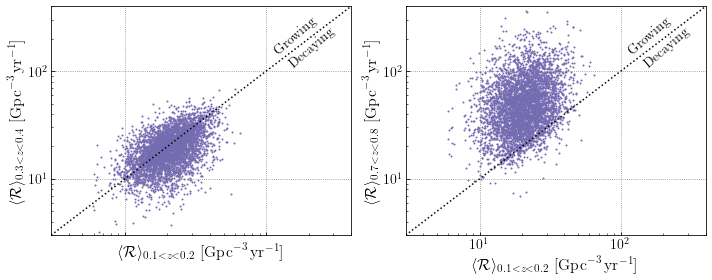

In [4]:
########################################################################
# Set up figure to compare merger rates in the 0.1-0.2 and 0.3-0.4 bands
########################################################################

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.set_rasterization_zorder(1)

# Scatter plot the mean rates computed above
ax.scatter(Rs_z_01_to_02,Rs_z_03_to_04,s=1,color='#756bb1',zorder=0)

# Misc formatting
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot([3,400],[3,400],color='black',ls=':')
ax.tick_params(labelsize=14)
ax.set_xlim(3,400)
ax.set_ylim(3,400)
ax.set_xticklabels([])

ax.set_xlabel(r'$\langle \mathcal{R}\rangle_{0.1< z < 0.2}\,\,{[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]}$',
             fontsize=16)
ax.set_ylabel(r'$\langle \mathcal{R}\rangle_{0.3<z<0.4}\,\,{[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]}$',
             fontsize=16)

ax.text(0.89, 0.78, 'Growing',
        verticalalignment='bottom',
        horizontalalignment='right',
        rotation=41.,
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.text(0.95, 0.72, 'Decaying',
        verticalalignment='bottom',
        horizontalalignment='right',
        rotation=41.,
        transform=ax.transAxes,
        color='black',
        fontsize=14)

########################################################################
# Set up figure to compare merger rates in the 0.1-0.2 and 0.7-0.8 bands
########################################################################

ax = fig.add_subplot(122)
ax.set_rasterization_zorder(1)

# Scatter plot mean rates computed above
ax.scatter(Rs_z_01_to_02,Rs_z_07_to_08,s=1,color='#756bb1',zorder=0)

# Misc formatting
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot([3,400],[3,400],color='black',ls=':')
ax.tick_params(labelsize=14)
ax.set_xlim(3,400)
ax.set_ylim(3,400)

ax.set_xlabel(r'$\langle \mathcal{R}\rangle_{0.1< z < 0.2}\,\,{[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]}$',
             fontsize=16)
ax.set_ylabel(r'$\langle \mathcal{R}\rangle_{0.7< z < 0.8}\,\,{[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]}$',
             fontsize=16)

ax.text(0.89, 0.78, 'Growing',
        verticalalignment='bottom',
        horizontalalignment='right',
        rotation=41.,
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.text(0.95, 0.72, 'Decaying',
        verticalalignment='bottom',
        horizontalalignment='right',
        rotation=41.,
        transform=ax.transAxes,
        color='black',
        fontsize=14)

plt.tight_layout()
plt.savefig('figure_07.pdf',bbox_inches='tight',dpi=200)
plt.show()

## 3. Save summary statistics as latex macros

In [5]:
with open('./../macros/significance_z_features.txt','w') as macrofile:
    
    macrofile.write("\\newcommand{{\\RedshiftSignificancePercentageLowRise}}{{{0:.0f}\\%}}".format(100.*significance_low_z_rise))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\RedshiftSignificancePercentageHighRise}}{{{0:.0f}\\%}}".format(100.*significance_high_z_rise))
    macrofile.write("\n")